<a href="https://colab.research.google.com/github/sharmaparnika/NEXT-WORD-PREDICTOR-USING-LSTM/blob/main/Next_Word_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the required Libraries:**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Art_of_war.txt to Art_of_war.txt


**Loading and Pre-processing the data:**

In [4]:
file = open("Art_of_war.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of The Art of War, by Sun Tzŭ This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.'

In [5]:

len(data)

330166

**Applying tokenization:**

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 84, 76, 557, 2, 1, 139, 2, 53, 15, 23, 36, 19, 557, 7]

In [7]:
len(sequence_data)

59009

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7092


In [9]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  59006


array([[  1,  84,  76, 557],
       [ 84,  76, 557,   2],
       [ 76, 557,   2,   1],
       [557,   2,   1, 139],
       [  2,   1, 139,   2],
       [  1, 139,   2,  53],
       [139,   2,  53,  15],
       [  2,  53,  15,  23],
       [ 53,  15,  23,  36],
       [ 15,  23,  36,  19]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)


In [11]:
print("Data: ", X[:10])
print("Response: ", y[:10])


Data:  [[  1  84  76]
 [ 84  76 557]
 [ 76 557   2]
 [557   2   1]
 [  2   1 139]
 [  1 139   2]
 [139   2  53]
 [  2  53  15]
 [ 53  15  23]
 [ 15  23  36]]
Response:  [557   2   1 139   2  53  15  23  36  19]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Creating the model:**

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             70920     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7092)              7099092   
                                                                 
Total params: 20,219,012
Trainable params: 20,219,012
Non-trainable params: 0
_________________________________________________________________


**Plotting the model:**

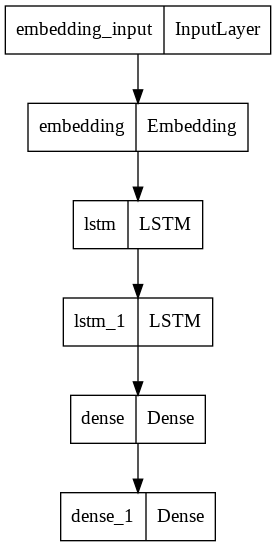

In [15]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

**Training the model:**

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
921/922 [============================>.] - ETA: 0s - loss: 6.8690
Epoch 1: loss improved from inf to 6.86857, saving model to next_words.h5
922/922 [==============================] - 37s 32ms/step - loss: 6.8686
Epoch 2/70
921/922 [============================>.] - ETA: 0s - loss: 6.3739
Epoch 2: loss improved from 6.86857 to 6.37386, saving model to next_words.h5
922/922 [==============================] - 30s 32ms/step - loss: 6.3739
Epoch 3/70
921/922 [============================>.] - ETA: 0s - loss: 6.0322
Epoch 3: loss improved from 6.37386 to 6.03208, saving model to next_words.h5
922/922 [==============================] - 29s 32ms/step - loss: 6.0321
Epoch 4/70
921/922 [============================>.] - ETA: 0s - loss: 5.7231
Epoch 4: loss improved from 6.03208 to 5.72361, saving model to next_words.h5
922/922 [==============================] - 30s 32ms/step - loss: 5.7236
Epoch 5/70
921/922 [============================>.] - ETA: 0s - loss: 5.4140
Epoch 5: loss impro

**Prediction:**

In [17]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: hello
['hello']
Error occurred:  in user code:

    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input

---